# Avalanche Index

The avalanche index within APS is based on a logarithmic look-up table. The index is based on the reported number of avalanches and their size. When multiple observations arre a available only the highest index presented. However, all inidcies within a day are stored in the APS database.

In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline
import pylab as plt
import datetime
import numpy as np
plt.rcParams['figure.figsize'] = (14, 6)

In [3]:
# DestructiveSizeName
DestructiveSizeName = ['1 - Harmløst(sluff)',
                      '2 - Små',
                      '3 - Middels',
                      '4 - Store',
                      '5 - Svært store']

# EstimatedNumTID
EstimatedNumTID = {
    '1':'Ett (1)',
    '2':'Noen (2-5)',
    '3':'Flere (6-10)',
    '4':'Mange (10 eller mer)'
}

[[  1.00000000e+00   3.00000000e+00   9.00000000e+00   2.70000000e+01]
 [  6.00000000e+00   1.80000000e+01   5.40000000e+01   1.62000000e+02]
 [  3.60000000e+01   1.08000000e+02   3.24000000e+02   9.72000000e+02]
 [  2.16000000e+02   6.48000000e+02   1.94400000e+03   5.83200000e+03]
 [  1.29600000e+03   3.88800000e+03   1.16640000e+04   3.49920000e+04]]


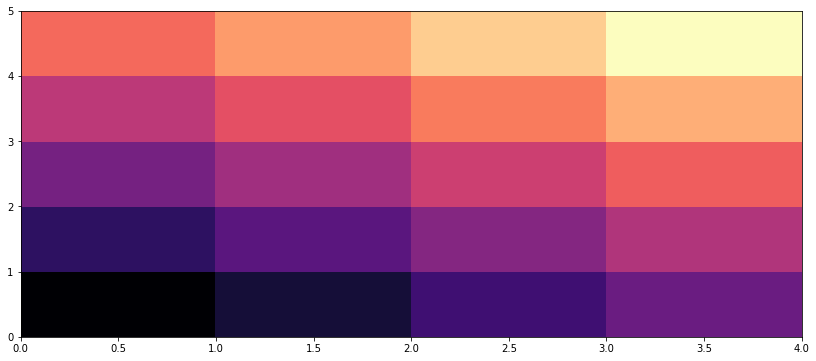

In [4]:
# Size factor
size_factor = 6.0
amount_factor = 3.0

# look-up table
LUT = np.array([[1.0, amount_factor, amount_factor**2, amount_factor**3],
               [size_factor, size_factor*amount_factor, size_factor*amount_factor**2, size_factor*amount_factor**3],
               [size_factor**2, size_factor**2 * amount_factor, size_factor**2 * amount_factor**2, size_factor**2 *amount_factor**3],
               [size_factor**3, size_factor**3 * amount_factor, size_factor**3 * amount_factor**2, size_factor**3 * amount_factor**3],
               [size_factor**4, size_factor**4 * amount_factor, size_factor**4 * amount_factor**2, size_factor**4 * amount_factor**3]])

plt.pcolormesh(np.log(LUT), cmap=plt.cm.magma)
#plt.colorbar()

print(LUT)

In [5]:
size1 = {'1': LUT[0,0], '2': LUT[0,1], '3': LUT[0,2], '4': LUT[0,3]}
size2 = {'1': LUT[1,0], '2': LUT[1,1], '3': LUT[1,2], '4': LUT[1,3]}
size3 = {'1': LUT[2,0], '2': LUT[2,1], '3': LUT[2,2], '4': LUT[2,3]}
size4 = {'1': LUT[3,0], '2': LUT[3,1], '3': LUT[3,2], '4': LUT[3,3]}
size5 = {'1': LUT[4,0], '2': LUT[4,1], '3': LUT[4,2], '4': LUT[4,3]}

avalanche_index = {'1 - Harmløst(sluff)': size1,
                   '2 - Små': size2,
                   '3 - Middels': size3,
                   '4 - Store': size4,
                   '5 - Svært store': size5}

In [6]:
example_sizes = [['3 - Middels', '4 - Store'],['3 - Middels', '2 - Små'], ['1 - Harmløst(sluff)', '2 - Små'], ['3 - Middels']]
example_amount = [['2', '3'], ['2', '4'], ['4', '3'], ['2']]

In [7]:
avalanche_index['2 - Små']['2']

18.0

In [8]:
result = []
for s, n in zip(example_sizes, example_amount):
    day_score = []
    for si, ni in zip(s ,n):
        day_score.append(avalanche_index[si][ni]) # calculate individual scores
        print("{0} {1} = {2}".format(si, ni, day_score[-1]))
    result.append(np.array(day_score).max())
print(result)

3 - Middels 2 = 108.0
4 - Store 3 = 1944.0
3 - Middels 2 = 108.0
2 - Små 4 = 162.0
1 - Harmløst(sluff) 4 = 27.0
2 - Små 3 = 54.0
3 - Middels 2 = 108.0
[1944.0, 162.0, 54.0, 108.0]


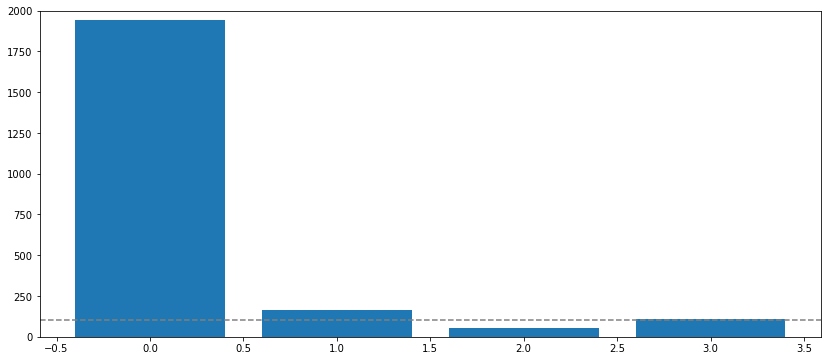

In [9]:
plt.bar(left=range(len(result)), height=result)
plt.ylim([0,2000])
plt.axhline(100, linestyle='--', color='grey') # a value of 100 corresponds to considerable avalanche activity

TODO:
Make an index for all observations of avalanche activity and a separate one regarding observerse with >=\*\*\* only.
